# Data Manipulation


Install necessary libraries

```Bash
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
```


Import necessary libraries


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data data from csv file


In [130]:
df = pd.read_csv("summary.csv")

Understand the data


In [131]:
# Number of rows, and columns
print(f"We've {len(df)} rows, and {len(df.columns)} columns.")
# The columns we have.
print("The data include these columns:", df.columns.values, sep="\n")

We've 2668 rows, and 18 columns.
The data include these columns:
['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365'
 'number_of_reviews_ltm' 'license']


In [132]:
print("(rows, columns)")
print(df.shape)

(rows, columns)
(2668, 18)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2668 non-null   int64  
 1   name                            2668 non-null   object 
 2   host_id                         2668 non-null   int64  
 3   host_name                       2668 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2668 non-null   object 
 6   latitude                        2668 non-null   float64
 7   longitude                       2668 non-null   float64
 8   room_type                       2668 non-null   object 
 9   price                           2579 non-null   float64
 10  minimum_nights                  2668 non-null   int64  
 11  number_of_reviews               2668 non-null   int64  
 12  last_review                     22

In [134]:
df.drop(["id", "host_id"], axis=1).describe()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,0.0,2668.000000,2668.000000,2579.000000,2668.00000,2668.000000,2287.000000,2668.000000,2668.000000,2668.000000
mean,NaN,39.983204,-82.989815,142.770066,7.45952,50.091454,2.318946,13.258621,194.419790,17.464768
std,NaN,0.040084,0.040977,124.446344,13.12943,85.014416,1.953317,18.523403,137.967943,22.443761
min,NaN,39.870097,-83.173610,9.000000,1.00000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,NaN,39.955740,-83.007393,76.000000,1.00000,3.000000,0.830000,2.000000,61.000000,1.000000
50%,NaN,39.977930,-82.997043,110.000000,2.00000,16.000000,1.880000,5.000000,180.000000,9.000000
75%,NaN,39.997612,-82.973175,165.000000,3.00000,57.000000,3.245000,19.000000,340.250000,26.000000
max,NaN,40.147290,-82.782440,1673.000000,300.00000,833.000000,15.400000,89.000000,365.000000,298.000000


In [135]:
df.describe(include="object")

,name,host_name,neighbourhood,room_type,last_review,license
count,2668,2668,2668,2668,2287,2300
unique,1685,720,26,3,330,1759
top,Rental unit in Columbus · 1 bedroom · 1 bed · ...,GH Hospitality,Near North/University,Entire home/apt,2023-12-10,Exempt
freq,67,89,823,2232,202,59


In [136]:
print(f"We have {df["room_type"].nunique()} room types such as:\n{df["room_type"].unique()}")
print(df["room_type"].value_counts())

We have 3 room types such as:
['Entire home/apt' 'Private room' 'Shared room']
room_type
Entire home/apt    2232
Private room        429
Shared room           7
Name: count, dtype: int64


In [137]:
print(f"Neighborhood include: {df["neighbourhood"].unique()}")

Neighborhood include: ['Near North/University' 'Near East' 'Near South' 'Clintonville'
 'West Olentangy' 'South Linden' 'Rocky Fork-Blacklick'
 'Eastmoor/Walnut Ridge' 'Hayden Run' 'Northland' 'Downtown' 'Northwest'
 'Far Northwest' 'North Linden' 'Far East' 'West Scioto' 'Far West'
 'Far South' 'Far North' 'Northeast' 'Hilltop' 'Eastland/Brice'
 'Greenlawn/Frank Road' 'Franklinton' 'Westland' 'Southeast']


In [138]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,90676,Home in Columbus · ★4.82 · 3 bedrooms · 3 beds...,483306,Audra & Lacey,NaN,Near North/University,39.98366,-83.00252,Entire home/apt,132.0,1,726,2023-12-17,4.88,3,0,101,2022-2475
1,543140,Home in Columbus · ★4.70 · 1 bedroom · 1 bed ·...,2350409,Edward,NaN,Near North/University,40.01114,-83.01005,Private room,29.0,7,133,2023-12-09,0.96,3,327,10,2019-1344
2,591101,Loft in Columbus · ★4.92 · 1 bedroom · 1 bed ·...,2889677,Gail,NaN,Near East,39.96041,-82.98005,Private room,110.0,2,296,2023-11-12,2.14,1,0,19,2019-1230
3,923248,Hostel in Columbus · ★4.74 · 1 bedroom · 5 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Shared room,30.0,1,348,2023-11-23,2.64,8,349,54,2019-1314
4,927867,Hostel in Columbus · ★4.72 · 1 bedroom · 1 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Private room,73.0,1,76,2023-10-28,0.61,8,336,9,2019-1314


In [139]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2663,1051802433105806294,Rental unit in Columbus · ★New · 1 bedroom · 1...,390404025,Sadio,NaN,Near North/University,39.982458,-82.996328,Entire home/apt,170.0,2,0,NaN,NaN,1,267,0,2019-2434
2664,1052161408967761461,Guesthouse in Columbus · ★New · 1 bedroom · 2 ...,72965873,Kasey,NaN,Clintonville,40.046764,-83.015215,Entire home/apt,16.0,1,0,NaN,NaN,1,255,0,2023-5287
2665,1052198066096852073,Home in Columbus · ★New · 2 bedrooms · 1 bath,52044755,Cellar Door,NaN,Near South,39.931995,-82.979274,Entire home/apt,63.0,1,0,NaN,NaN,5,353,0,2023-3997
2666,1052240800189326761,Home in Blacklick · ★New · 3 bedrooms · 4 beds...,519608982,Lwam,NaN,Far East,39.991573,-82.817957,Entire home/apt,136.0,1,0,NaN,NaN,1,269,0,2023-5232
2667,1053696263915202142,Home in Columbus · ★New · 3 bedrooms · 1.5 baths,552434649,Rashed,NaN,Near East,39.972791,-82.981849,Entire home/apt,92.0,2,0,NaN,NaN,1,179,0,2023-1098


Cleaning the data


In [140]:
# See if we have missing value
print(f"We've {df.isna().sum().sum()} missing values.")
print(df.isna().sum().sort_values(ascending=False))

We've 3887 missing values.
neighbourhood_group               2668
reviews_per_month                  381
last_review                        381
license                            368
price                               89
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
name                                 0
minimum_nights                       0
number_of_reviews                    0
host_name                            0
host_id                              0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
id                                   0
dtype: int64


In [141]:
# Is there columns with no data?
columns_with_no_data = df.columns[df.isna().all()].values
print("These columns don't have any data:")
print(columns_with_no_data)
# drop them
df.drop(columns_with_no_data, axis=1, inplace=True)

These columns don't have any data:
['neighbourhood_group']


In [142]:
# let's see if there's any duplicated data
df.duplicated(keep=False).sum()

0

In [143]:
# drop unnecessary columns that we don't need in our analysis like latitude, and longitude
columns_to_drop = ["latitude", "longitude"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [144]:
# cleaning wrong format if there is
df["last_review"] = pd.to_datetime(df["last_review"])

In [145]:
# cleaning wrong data
# if we look to the airbnb's policy we see that the maximum nights is 90
df.loc[df["minimum_nights"] > 90, ["minimum_nights", "price"]]
# we find minimum night as 300 and it's look like it's 30 and it's entered 300 by wrong, let's change it

,minimum_nights,price
535,300,1015.0


In [146]:
df.loc[535, "minimum_nights"] = 30

Look for relationships between the data


In [147]:
# df["price"].corr(df["number_of_reviews"])
df.drop(["id", "host_id"], axis=1).select_dtypes(include="number").corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.165666,-0.090324,-0.072426,-0.000594,0.017288,-0.075119
minimum_nights,-0.165666,1.000000,-0.217998,-0.357243,-0.061059,0.152795,-0.332741
number_of_reviews,-0.090324,-0.217998,1.000000,0.611451,-0.066341,-0.188877,0.684224
reviews_per_month,-0.072426,-0.357243,0.611451,1.000000,0.011988,-0.192453,0.865410
calculated_host_listings_count,-0.000594,-0.061059,-0.066341,0.011988,1.000000,0.139513,0.013166
availability_365,0.017288,0.152795,-0.188877,-0.192453,0.139513,1.000000,-0.212991
number_of_reviews_ltm,-0.075119,-0.332741,0.684224,0.865410,0.013166,-0.212991,1.000000


In [148]:
# crosstab
pd.crosstab(df["neighbourhood"], df["room_type"])
# In Downtown there's 187 Entire homes/apt, 43 Private rooms, and 0 Shared room

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Clintonville,98,11,0
Downtown,187,43,0
Eastland/Brice,7,13,0
Eastmoor/Walnut Ridge,45,20,1
Far East,8,8,0
Far North,12,3,0
Far Northwest,18,3,0
Far South,5,3,0
Far West,2,2,0


In [149]:
df["price"].mean()

142.7700659170221

In [150]:
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    153.439647
Private room        89.497608
Shared room         40.714286
Name: price, dtype: float64

In [151]:
for i in df["room_type"].unique():
    df[(df["room_type"]=="Private room") & (df["price"].isna())]["price"].fillna(df.loc[df["room_type"] == "Private room", "price"].mean())

In [152]:
# fillna
# Get unique room types
room_types = df["room_type"].unique()

for room_type in room_types:
    room_type_data = df[df["room_type"] == room_type]["price"]
    print(
        f"Number of missing data in {room_type}:",
        room_type_data.isna().sum(),
        "Mean:",
        room_type_data.mean(),
    )

df["price"].fillna(df.groupby("room_type")["price"].transform("mean"), inplace=True)

df["price"].isna().sum()

Number of missing data in Entire home/apt: 78 Mean: 153.43964716805942
Number of missing data in Private room: 11 Mean: 89.49760765550239
Number of missing data in Shared room: 0 Mean: 40.714285714285715


0

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2668 non-null   int64         
 1   name                            2668 non-null   object        
 2   host_id                         2668 non-null   int64         
 3   host_name                       2668 non-null   object        
 4   neighbourhood                   2668 non-null   object        
 5   room_type                       2668 non-null   object        
 6   price                           2668 non-null   float64       
 7   minimum_nights                  2668 non-null   int64         
 8   number_of_reviews               2668 non-null   int64         
 9   last_review                     2287 non-null   datetime64[ns]
 10  reviews_per_month               2287 non-null   float64       
 11  calc

# Data Overview


In [154]:
# average price by room type
df.groupby("room_type")["price"].mean()

room_type
Entire home/apt    153.439647
Private room        89.497608
Shared room         40.714286
Name: price, dtype: float64

In [155]:
# average price by neighborhood
df.groupby("neighbourhood")["price"].mean()

neighbourhood
Clintonville             152.181271
Downtown                 151.762781
Eastland/Brice           121.550000
Eastmoor/Walnut Ridge    135.823014
Far East                 107.312500
Far North                142.600000
Far Northwest            137.494138
Far South                125.179956
Far West                 131.250000
Franklinton              134.188546
Greenlawn/Frank Road     110.634235
Hayden Run               134.666667
Hilltop                  101.080000
Near East                145.470888
Near North/University    148.249271
Near South               146.702456
North Linden             113.078010
Northeast                204.872845
Northland                 89.712529
Northwest                126.980677
Rocky Fork-Blacklick     127.151970
South Linden             113.337234
Southeast                458.200000
West Olentangy           141.823775
West Scioto              115.000000
Westland                  95.087929
Name: price, dtype: float64

In [156]:
# top 10 hosts by review
df.groupby(["host_id", "host_name"])["number_of_reviews"].sum(numeric_only=True).sort_values(
    ascending=False
).reset_index().head(10)[["host_name", "number_of_reviews"]]

,host_name,number_of_reviews
0,Nicole,6352
1,Marc (TailwindSTR),3626
2,Ingrid & Mike,3264
3,Jessie,3145
4,Sarah,2852
5,Kate & Nat,2773
6,GH Hospitality,2455
7,Sergio,2319
8,Marc And Darius,2055
9,Audra & Lacey,1892


In [157]:
df[df["host_id"] == 552434649]

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2667,1053696263915202142,Home in Columbus · ★New · 3 bedrooms · 1.5 baths,552434649,Rashed,Near East,Entire home/apt,92.0,2,0,NaT,NaN,1,179,0,2023-1098


In [158]:
df[df["host_id"] == 552434649]["number_of_reviews"]
df.iloc[2667, 8]
df.loc[2667, "number_of_reviews"]
df.loc[df["host_id"] == 552434649, "number_of_reviews"]

2667    0
Name: number_of_reviews, dtype: int64

# New features

In [159]:
# Extract number of stars from name
index = df["name"].str.find("★")


def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False


def extract(x: str):
    i = x.find("★")
    if i == -1:
        return np.nan
    else:
        x = x[i + 1 : i + 5]
        if is_float(x): # check if we can convert to float
            return float(x)
        else:
            return np.nan

df["stars"] = df["name"].apply(extract)

In [160]:
df["stars"]

0       4.82
1       4.70
2       4.92
3       4.74
4       4.72
        ... 
2663     NaN
2664     NaN
2665     NaN
2666     NaN
2667     NaN
Name: stars, Length: 2668, dtype: float64

# Ploting


In [161]:
sns.set_theme(style="darkgrid")

Number of room by room_type


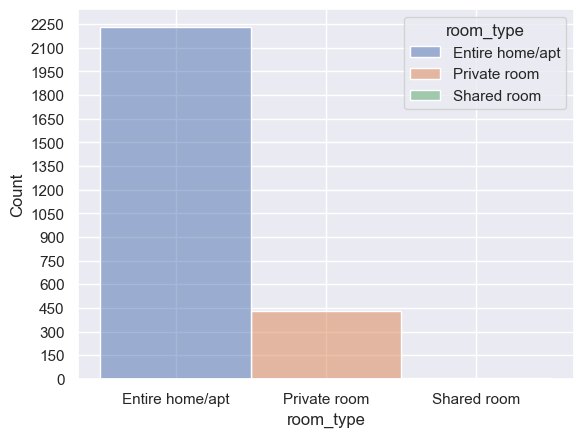

In [162]:
sns.histplot(
    data=df,
    x="room_type",
    legend=True,
    hue="room_type",
)
plt.yticks(
    np.arange(
        0,
        len(df[df["room_type"] == "Entire home/apt"]) + 150,
        150,
    ),
)
plt.show()

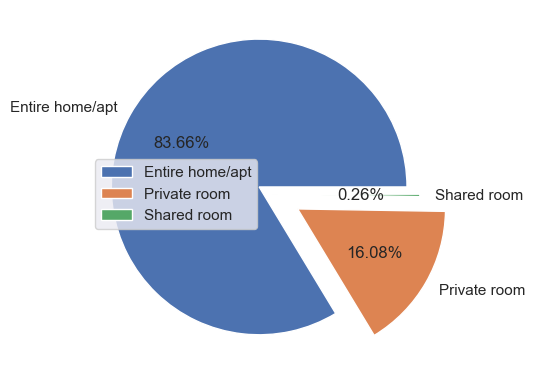

In [163]:
plt.pie(
    df["room_type"].value_counts(),
    labels=df["room_type"].unique(),
    autopct="%0.2f%%",
    explode=(0.1, 0.2, 0),
)
plt.legend()
plt.show()

Neighbourhoods


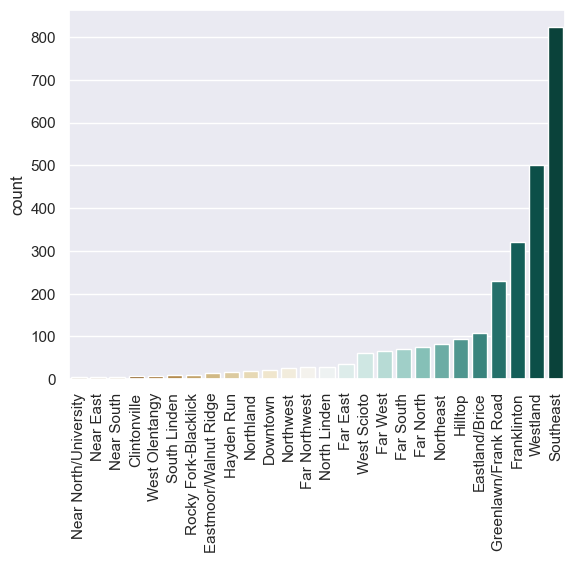

In [164]:
sns.barplot(
    y=df["neighbourhood"].value_counts(ascending=True),
    x=df["neighbourhood"].unique(),
    palette="BrBG",
    hue=df["neighbourhood"].unique(),
)
plt.xticks(rotation=90)
plt.show()

Conclusion:
Number of Entire home/apt is higher than other room types it's about 84% of the total room. and the rest is shared room and private room with about 16% and less than 1% respectively.


Price Distribution


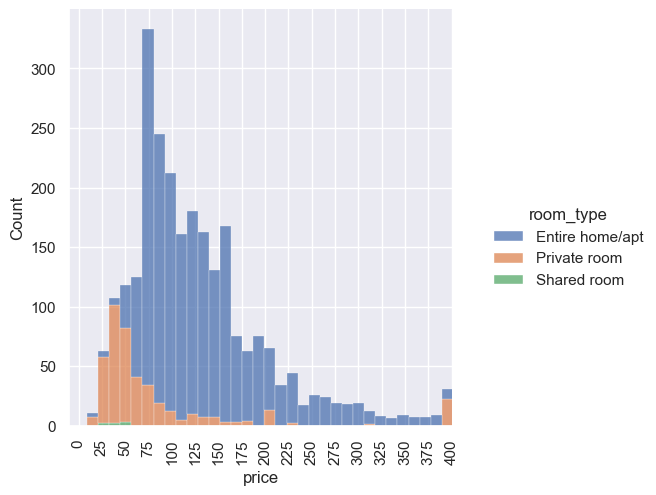

In [165]:
sns.displot(
    data=df,
    x="price",
    hue="room_type",
    multiple="stack",
)
plt.xlim(-10, 400)
plt.xticks(np.arange(0, 401, 25), rotation=90)
plt.show()

price distribution by room type


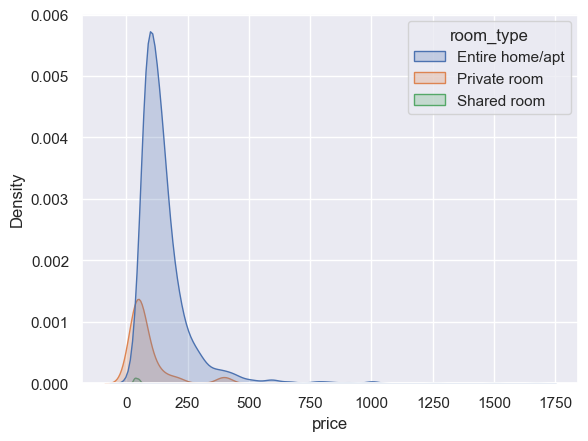

In [166]:
sns.kdeplot(
    data=df,
    x="price",
    hue="room_type",
    fill=True,
)
plt.show()

Conclusion:
The price distribution is left-skewed. but it look like we have some outliers.


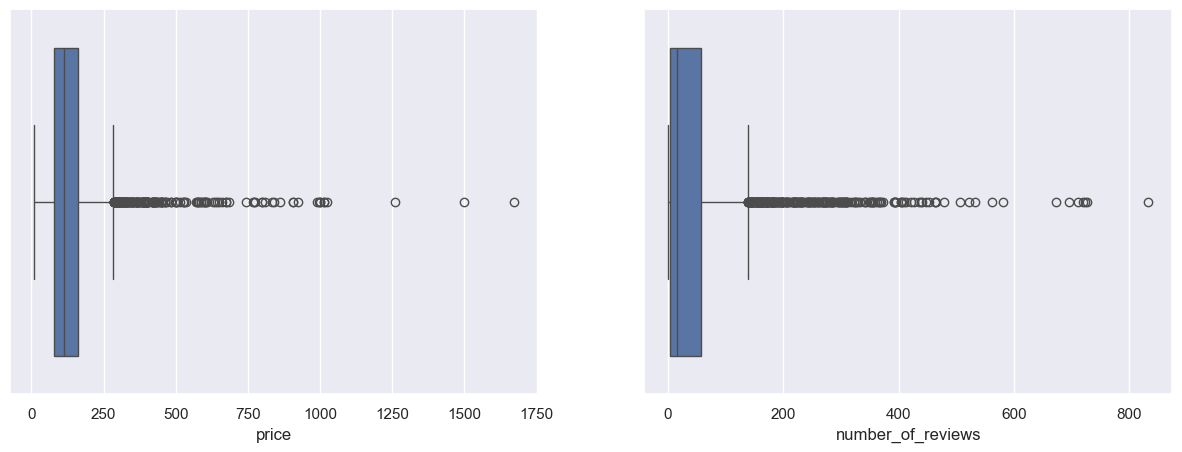

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    df["price"],
    orient="h",
    ax=axes[0],
)

sns.boxplot(
    df["number_of_reviews"],
    orient="h",
    ax=axes[1],
)
plt.show()

it's looks like there's outliers in the price column, let's remove them.

In [168]:
Q1 = np.quantile(df["price"], 0.25)
Q3 = np.quantile(df["price"], 0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - 1.5* IQR
upper_boundary = Q3 + 1.5* IQR
print(lower_boundary)
print(upper_boundary)
print(f"{len(df[df["price"] > upper_boundary])/len(df)*100:0.2f}% of price are more than {upper_boundary}")
print(f"{len(df[df["price"] < lower_boundary])/len(df)*100:0.2f}% of price are less than {lower_boundary}")

-47.5
284.5
7.83% of price are more than 284.5
0.00% of price are less than -47.5


In [ ]:
df = df[df["price"] <= upper_boundary]

How minimum nights affect on price


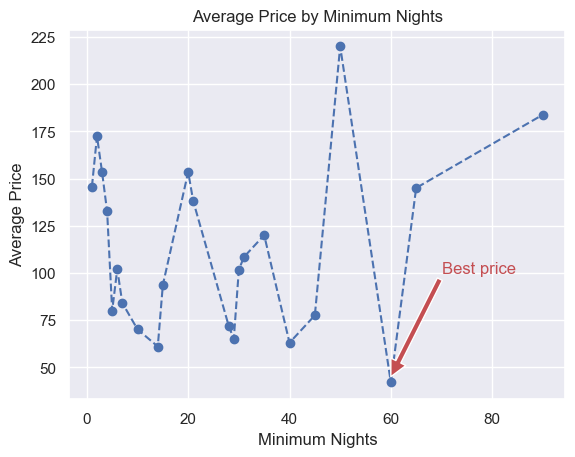

In [193]:
plt.plot(
    df.groupby("minimum_nights")["price"].mean(),
    "b--o",
)
plt.title("Average Price by Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Average Price")
plt.annotate(
    "Best price",
    (60, 45),
    (70, 100),
    arrowprops=dict(facecolor="r"),
    color="r",
)
plt.show()

Let's look to the correlation


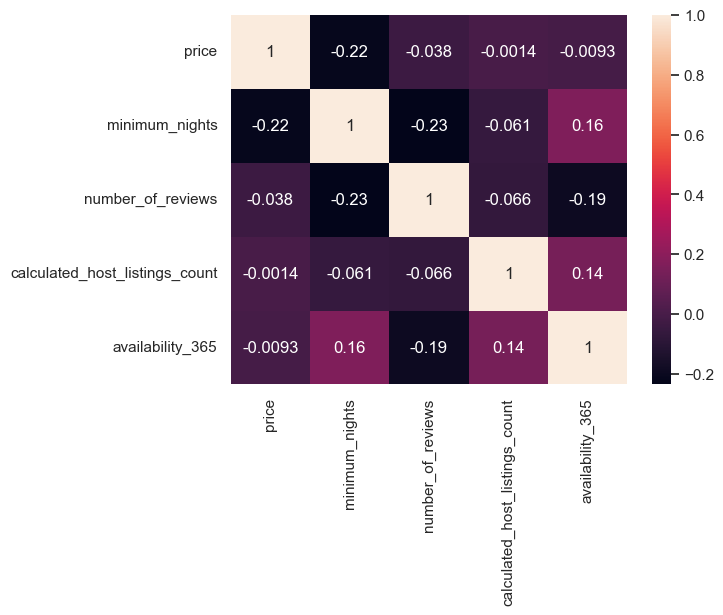

In [ ]:
corr = df.drop(["id", "host_id"], axis=1).select_dtypes(np.number).corr()
sns.heatmap(corr, annot=True)
plt.show()

From the heat map we find that number_of_reviews. and number_of_reviews_ltm, and reviews_per_month are highly correlated, so we can drop two of them.


In [ ]:
df = df.drop(["number_of_reviews_ltm", "reviews_per_month"], axis=1)

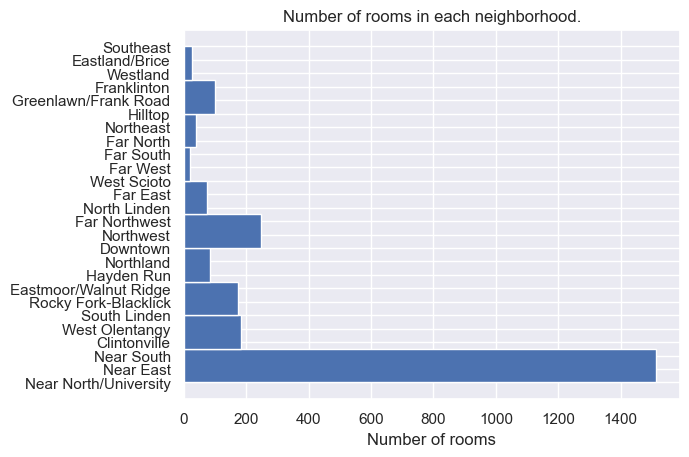

In [ ]:
plt.hist(
    df["neighbourhood"],
    orientation="horizontal",
)
plt.title("Number of rooms in each neighborhood.")
plt.xlabel("Number of rooms")
plt.show()

Top 10 host by number of reviews

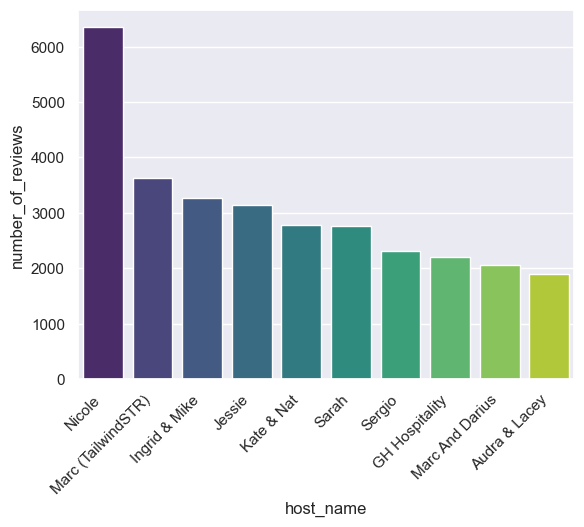

In [ ]:
x = df.groupby(["host_id", "host_name"])["number_of_reviews"].sum().reset_index()
top_10_hosts = x.sort_values(by="number_of_reviews", ascending=False).head(10)

sns.barplot(
    data=top_10_hosts,
    x="host_name",
    y="number_of_reviews",
    hue="host_name",
    palette="viridis",
)
plt.xticks(rotation=45, ha="right")
plt.show()